# **NETFLIX MOVIES AND TV SHOWS ANALYSIS 🎥**

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

#### Importing Necessary libraries

In [ ]:
!pip install dash

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML, display
import seaborn as sns
import matplotx
import palettable
pd.options.mode.chained_assignment = None

#### Reviewing The Data

In [45]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## CLEANING THE DATA

### FOR WHOLE DATA

LOOKING FOR MISSING DATA

In [ ]:
# USING THE NUMPY MEAN
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print(f"{col} ---> {pct_missing*100}%")

show_id ---> 0.0%
type ---> 0.0%
title ---> 0.0%
director ---> 29.908027705234474%
cast ---> 9.367548540933349%
country ---> 9.435676166685592%
date_added ---> 0.11354604292040424%
release_year ---> 0.0%
rating ---> 0.04541841716816169%
duration ---> 0.034063812876121265%
listed_in ---> 0.0%
description ---> 0.0%


CHECKING THE NULL VALUES

In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df

COUNTING THE MISSING DATA

In [23]:
nan_df = df[df.isna().any(axis=1)]
count_nan = len(nan_df) - nan_df.count()
count_nan

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Augmenting Data with Adding New Columns

ADDING A YEAR COLUMN

In [46]:
df['Year_added'] = pd.to_datetime(df['date_added']).dt.year

ADDING MONTH COLUMN

In [47]:
df['Month_added'] = pd.to_datetime(df['date_added']).dt.month

ADDING COUNT COLUMN

In [48]:
df['count'] = 1

For Movies Duration

In [38]:
def get_duration(_):
  return _.split(' ')[0]

For the Number of Seasons Of a TV Show

In [31]:
def get_season(_):
  return _.split(' ')[0]

Counting the name of Actor/Actress

In [53]:
cast_names_counter = {}
#Iterating throught Cast Column
for index, row in df[['cast']].dropna().iterrows():
  cast = row['cast']
  #Splitting the Row Values 
  cast_split = cast.split(',')
  cast_stripped = [name.strip().lower() for name in cast_split]
  
  #Counting The repeated names
  for name in cast_stripped:
    cast_names_counter[name] = cast_names_counter.get(name, 0) + 1

#Creating a sorted dict to store the resulting values
names = dict(sorted(cast_names_counter.items(), key=lambda item: item[1], reverse=True))
print(names)

{'anupam kher': 43, 'shah rukh khan': 35, 'julie tejwani': 33, 'naseeruddin shah': 32, 'takahiro sakurai': 32, 'rupa bhimani': 31, 'akshay kumar': 30, 'om puri': 30, 'yuki kaji': 29, 'amitabh bachchan': 28, 'paresh rawal': 28, 'boman irani': 27, 'rajesh kava': 26, 'vincent tong': 26, 'andrea libman': 25, 'kareena kapoor': 25, 'samuel l. jackson': 24, 'john cleese': 24, 'jigna bhardwaj': 23, 'fred tatasciore': 23, 'tara strong': 23, 'daisuke ono': 22, 'junichi suwabe': 21, 'ajay devgn': 21, 'ashleigh ball': 21, 'kay kay menon': 21, 'nicolas cage': 21, 'nawazuddin siddiqui': 21, 'adam sandler': 20, 'david attenborough': 20, 'salman khan': 20, 'david spade': 19, 'yuichi nakamura': 19, 'erin fitzgerald': 19, 'mamoru miyano': 19, 'morgan freeman': 19, 'james franco': 19, 'seth rogen': 19, 'ai kayano': 19, 'fred armisen': 19, 'gulshan grover': 19, 'vatsal dubey': 18, 'rajesh sharma': 18, 'fortune feimster': 18, 'diana kaarina': 18, 'yashpal sharma': 18, 'kana hanazawa': 18, 'laura bailey': 1

Function To Count the Objects

In [54]:
def NC (df):
  col_name = input('Enter The Targeted Column: ')
  names_counter = {}
  #Iterating throught Cast Column
  for index, row in df.iterrows():
    string = row[col_name]
    #Splitting the Row Values 
    splitted = string.split(',')
    stripped = [name.strip().lower() for name in splitted]
    #Counting The repeated names
    for name in stripped:
      names_counter[name] = names_counter.get(name, 0) + 1
  x = dict(sorted(names_counter.items(), key=lambda item: item[1], reverse=False))
  Range = int(input("Enter The Range Of Values: "))
  #Creating a sorted dict to store the resulting values
  return pd.DataFrame(list(x.items()), columns = [col_name.title(),'Count']).tail(Range)


### FOR THE  "MOVIE"  TYPE DATA 🎥

In [ ]:
movies = df[df['type'] == 'Movie']

Duration Column

In [ ]:
movies['Duration'] = movies['duration'].dropna().apply(lambda x: get_duration(x))
movies['Duration'] = movies['Duration'].dropna().astype('int64')
movies.head(3)

Title Length Column

In [ ]:
movies['title_length'] = [len(title) for title in movies['title']] 
title_len = movies.sort_values(['title_length'],ascending=False)
title_len.head()

### FOR THE  "TV Shows"  TYPE DATA 📺

In [224]:
tv_df  = df[df['type'] == 'TV Show']

In [ ]:
tv_df['title_length'] = [len(title) for title in tv_df['title']] 
title_len2 = tv_df.sort_values(['title_length'],ascending=False)

## Analysing the Data

### For The Whole Data

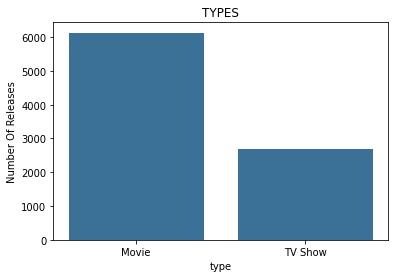

In [64]:
types = df.groupby(['type']).sum().reset_index()[['type','count']]
plt.bar(types['type'], types['count'],color='#3B7197')
#Creating The Plot
plt.xticks(types['type'],size=10)
plt.title('TYPES')
plt.xlabel('type')
plt.ylabel('Number Of Releases')
#Plot Show
plt.show()

The Year netflix added the most content to its platform


In [164]:
release_year = df.groupby(['Year_added']).sum().reset_index()[['Year_added','count']]

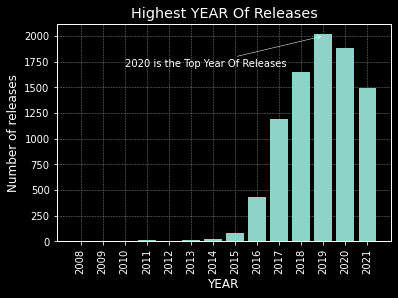

In [291]:
fig, ax = plt.subplots()
plt.bar(release_year['Year_added'], release_year['count'])
plt.xticks(release_year['Year_added'],rotation='vertical')
plt.title('Highest YEAR Of Releases')
plt.xlabel('YEAR')
plt.ylabel('Number of releases')
plt.style.use('dark_background')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.annotate("2020 is the Top Year Of Releases", xy=(2019, 2000), xytext=(2010, 1700), arrowprops=dict(arrowstyle="->"))
plt.show()

Which actor/actress shows up most frequently in the netflix database

In [167]:
#Selecting the columns needed
title_cast = df[['title','cast']]
title_cast = title_cast.dropna()

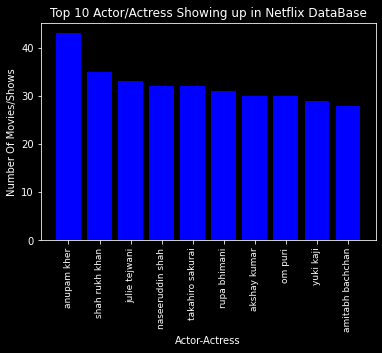

In [169]:
#converting the names Dict into a DataFrame
names_df = pd.DataFrame(list(names.items()), columns = ['Name','Count'])
names_df2 = names_df[names_df['Count'] > 15]
n = names_df2.iloc[:10]
#Getting The Data
plt.bar(n['Name'], n['Count'],color='Blue')
#Creating The Plot
plt.xticks(n['Name'],rotation=90,size=9)
plt.title('Top 10 Actor/Actress Showing up in Netflix DataBase')
plt.xlabel('Actor-Actress')
plt.ylabel('Number Of Movies/Shows')
#Plot Show
plt.show()

Most popular month to add content


In [ ]:
adding_month = df.groupby(['Month_added']).sum().reset_index()[['Month_added','count']]
Releases = adding_month.sort_values(['Month_added'])

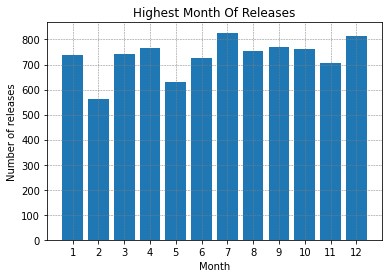

In [ ]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, ax = plt.subplots()
plt.bar(months, Releases['count'])
plt.xticks(months)
plt.title('Highest Month Of Releases')
plt.xlabel('Months')
plt.ylabel('Number of releases')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

Countries With the Most Production Contribution

In [ ]:
country = df.groupby(['country']).sum().reset_index()[['country','count']]
top_country_production = country.sort_values(['count']).tail(16)

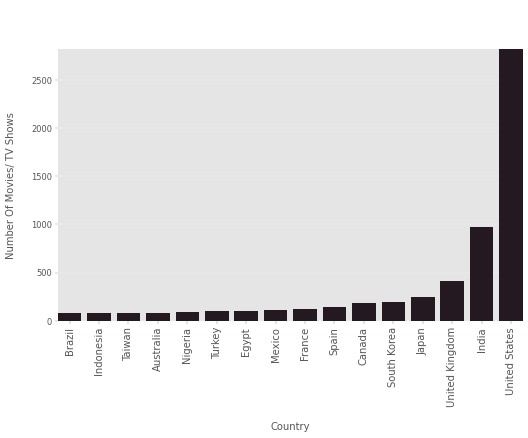

In [ ]:
figure(figsize=(10,6), dpi=60)
#Getting The Data
plt.bar(top_country_production['country'], top_country_production['count'],color='#251921')
#Creating The Plot
plt.xticks(top_country_production['country'],rotation='vertical',size=12)
plt.title('Top Countries Of Production')
plt.xlabel('Country')
plt.ylabel('Number Of Movies/ TV Shows')
plt.style.use('ggplot')

#Plot Show
plt.show()

Most Popular Rating Type Of Movies On The Platform

In [170]:
rating = df.groupby(['rating']).sum().reset_index()[['rating','count']]
Rating = rating.drop(range(0,3)).sort_values(['count'])

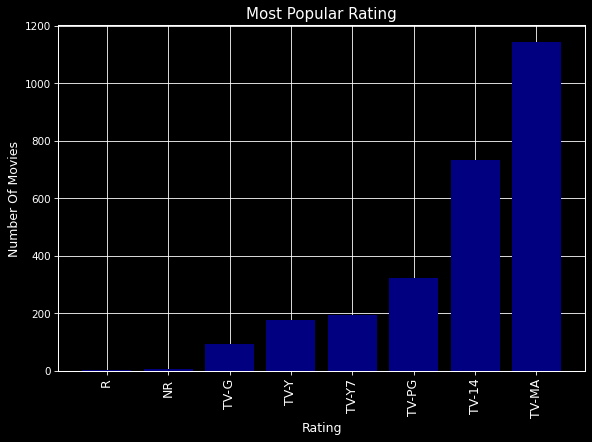

In [333]:
#Getting The Data
figure(figsize=(8,6), dpi=75)
plt.bar(Rating['rating'], Rating['count'],color='Navy')
#Creating The Plot
plt.xticks(Rating['rating'],rotation='vertical',size=12)
plt.title('Most Popular Rating')
plt.xlabel('Rating')
plt.ylabel('Number Of Movies')
plt.style.use('dark_background')

#Plot Show
plt.tight_layout()
plt.show()

### For Movies

In [ ]:
Adding_year_movies = movies.groupby(['Year_added']).sum().reset_index()[['Year_added','count']]
Adding_year_movies.sort_values(['count'],ascending=False)

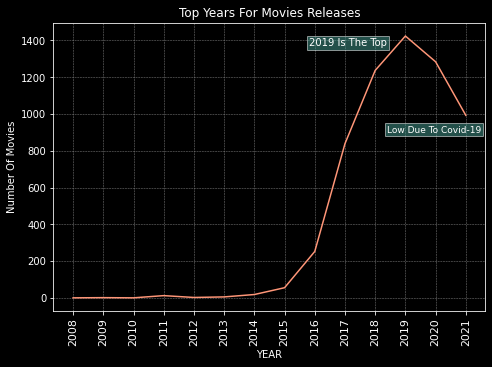

In [162]:
fig, ax = plt.subplots()
fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=120)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()

plt.plot(Adding_year_movies['Year_added'],Adding_year_movies['count'],color='#FF9678')
plt.xticks(Adding_year_movies['Year_added'],rotation='vertical',size=11)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.style.use('dark_background')
plt.title('Top Years For Movies Releases')
plt.xlabel('YEAR')
plt.ylabel("Number Of Movies")
ax.text(2015.8, 1370, '2019 Is The Top',fontsize = 10,bbox ={'facecolor':'#46A094','alpha':0.5, 'pad':2})
ax.text(2018.4, 900, 'Low Due To Covid-19',fontsize = 9,bbox ={'facecolor':'#46A094','alpha':0.5, 'pad':2})
plt.show()

Movie With The Longest Title

[*Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifto*](https://www.netflix.com/eg-en/title/80209608)

In [184]:
movies[['title','title_length']].sort_values('title_length',ascending=False).head(1)

,title,title_length
5164,Jim & Andy: The Great Beyond - Featuring a Ver...,104


The Frequently Used length of Letters For Movies Titles

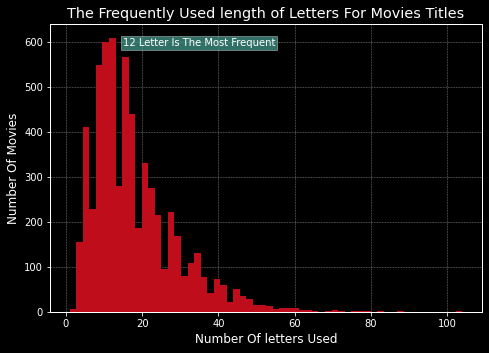

In [222]:
fig, ax = plt.subplots()
fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()
plt.hist(movies['title_length'],bins=60,color='#BF0D1C')
plt.style.use('dark_background')
plt.title("The Frequently Used length of Letters For Movies Titles")
plt.xlabel("Number Of letters Used")
plt.ylabel("Number Of Movies")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.text(15, 590, '12 Letter Is The Most Frequent',fontsize = 10,bbox ={'facecolor':'#46A094','alpha':0.7, 'pad':2})
plt.show()

Movie With The Longest Duration

[Black Mirror: Bandersnatch](https://www.netflix.com/eg-en/title/80988062)

In [183]:
movies[['title','Duration']].sort_values('Duration',ascending=False).head(1)

,title,Duration
4253,Black Mirror: Bandersnatch,312.0


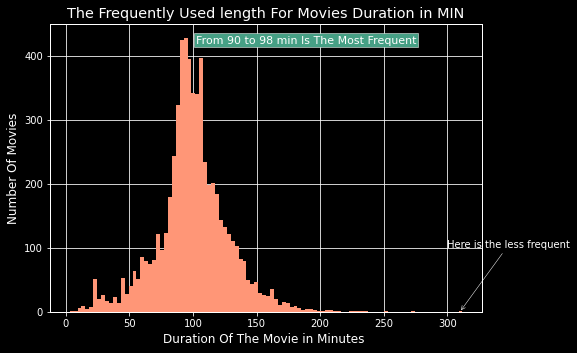

In [221]:
fig, ax = plt.subplots()
fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=120)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()
plt.hist(movies['Duration'],bins=100,color='#FF9677')
plt.style.use('dark_background')
plt.title("The Frequently Used length For Movies Duration in MIN")
plt.xlabel("Duration Of The Movie in Minutes ")
plt.ylabel("Number Of Movies")
ax.text(102, 420, 'From 90 to 98 min Is The Most Frequent',fontsize = 11,bbox ={'facecolor':'#46A085','alpha':1, 'pad':2})
plt.annotate("Here is the less frequent", xy=(310, 0), xytext=(300, 100), arrowprops=dict(arrowstyle="->"))
plt.show()

Top Country Contributed in the production Of Movies On The PlatForm

United States Of America 🏈

In [263]:
movie_country = movies[['country','count']].dropna()
top_MC = NC(movie_country)

Enter The Targeted Column: country
Enter The Range Of Values: 15


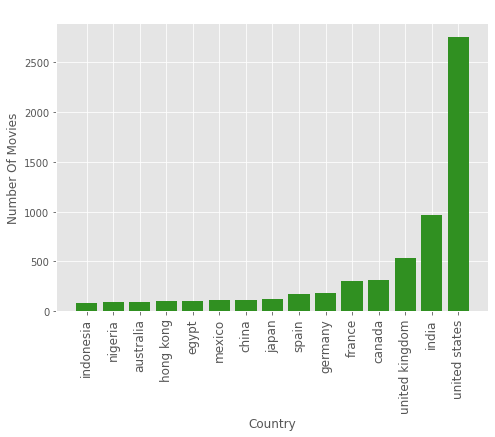

In [283]:
fig, ax = plt.subplots()
fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=120)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()
plt.bar(top_MC['Country'], top_MC['Count'],color='#309021')
#Creating The Plot
plt.xticks(top_MC['Country'],rotation='vertical',size=12)
plt.title('Top Countries Of Production')
plt.xlabel('Country')
plt.ylabel('Number Of Movies')
plt.show()

Top Category Of Movies

In [308]:
listed_in_movies = movies[['listed_in','count']].dropna()
top_dir = NC(listed_in_movies)

Enter The Targeted Column: listed_in
Enter The Range Of Values: 20


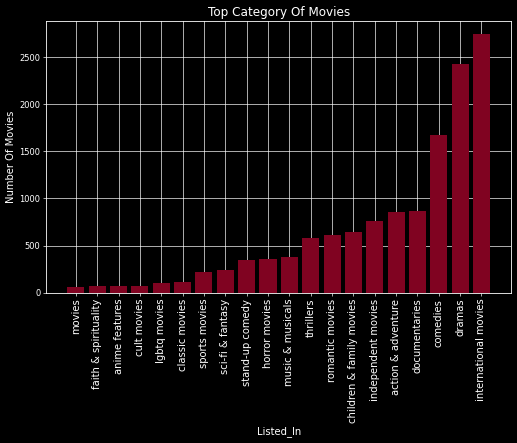

In [322]:
figure(figsize=(10,6), dpi=60)
#Getting The Data
plt.bar(top_dir['Listed_In'], top_dir['Count'],color='#800321')
#Creating The Plot
plt.xticks(top_dir['Listed_In'],rotation='vertical',size=12)
plt.title('Top Category Of Movies')
plt.xlabel('Listed_In')
plt.ylabel('Number Of Movies')
plt.style.use('dark_background')
#Plot Show
plt.show()

### Analysis For TV Shows

TV Show With The longest Title

[Ken Burns Presents: College Behind Bars: A Film by Lynn Novick and Produced by Sarah Botstein](https://www.netflix.com/cx/title/81247408)

In [227]:
tv_df[['title','title_length']].sort_values('title_length',ascending=False).head(1)

,title,title_length
2813,Ken Burns Presents: College Behind Bars: A Fil...,93


Most Added year for *TV_Shows*

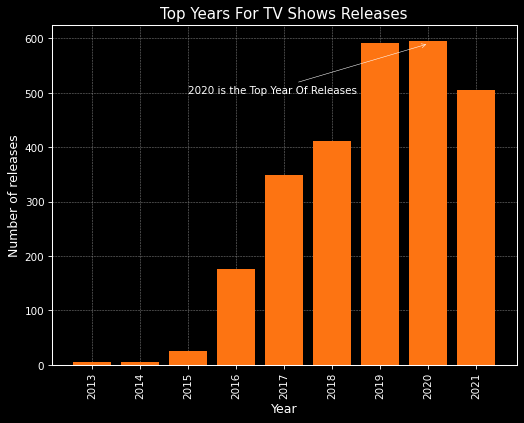

In [239]:
top_year = tv_df.groupby(['Year_added']).sum().reset_index()[['Year_added','count']]
top_year.sort_values(['count'],ascending=False)
top_year = top_year.drop(0)
#--------------------------------------------------------------------------------------#
figure(figsize=(8,6), dpi=75)
plt.bar(top_year['Year_added'], top_year['count'],color='#FD7412')
plt.xticks(top_year['Year_added'],rotation='vertical')
plt.title('Top Years For TV Shows Releases')
plt.xlabel('Year')
plt.ylabel('Number of releases')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.style.use('dark_background')
plt.annotate("2020 is the Top Year Of Releases", xy=(2020, 590), xytext=(2015, 500), arrowprops=dict(arrowstyle="->"))
plt.show()

Top 25 The Longest TV Shows By Season

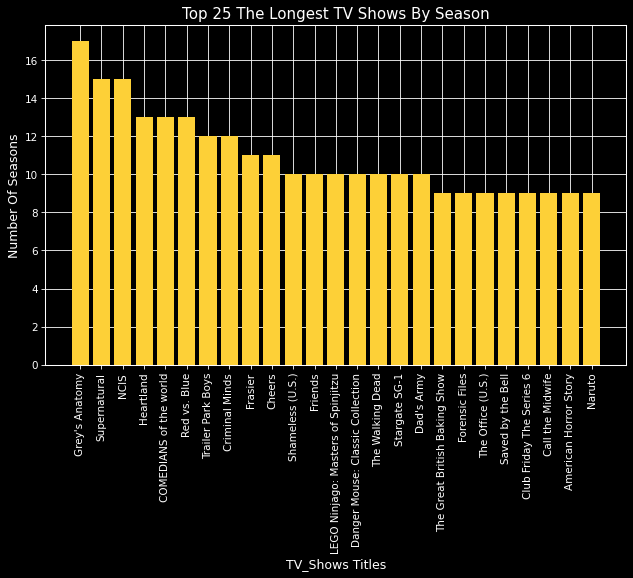

In [240]:
tv_df['Seasons'] = tv_df['duration'].apply(lambda x: get_season(x))
tv_df['Seasons'] = tv_df['Seasons'].astype('int64')
longest_tv_show = tv_df[['title','Seasons']].sort_values(['Seasons'],ascending=False)
longest_tv_show = longest_tv_show.iloc[0:25]
#--------------------------------------------------------------------------------------#
#To Centeralize The OutPut
# display(HTML("""
# <style>
# #output-body {
#     display: flex;
#     align-items: center;
#     justify-content: center;
# }
# </style>
# """))
#--------------------------------------------------------------------------------------#
figure(figsize=(10,6), dpi=75)
plt.bar(longest_tv_show['title'],longest_tv_show['Seasons'],color='#FDD037')
plt.xticks(longest_tv_show['title'],rotation='vertical',size=10)
plt.xlabel("TV_Shows Titles")
plt.ylabel("Number Of Seasons")
plt.title('Top 25 The Longest TV Shows By Season')
plt.show()

The Most Type Of Rating Of TV Shows Presented On Netflix

[TV-MA](https://en.wikipedia.org/wiki/TV_Parental_Guidelines#TV-MA): This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under

Is The Top One

In [262]:
rating = tv_df.groupby(['rating']).sum().reset_index()[['rating','count']]

,rating,count
0,NR,5
1,R,2
2,TV-14,733
3,TV-G,94
4,TV-MA,1145
5,TV-PG,323
6,TV-Y,176
7,TV-Y7,195
8,TV-Y7-FV,1


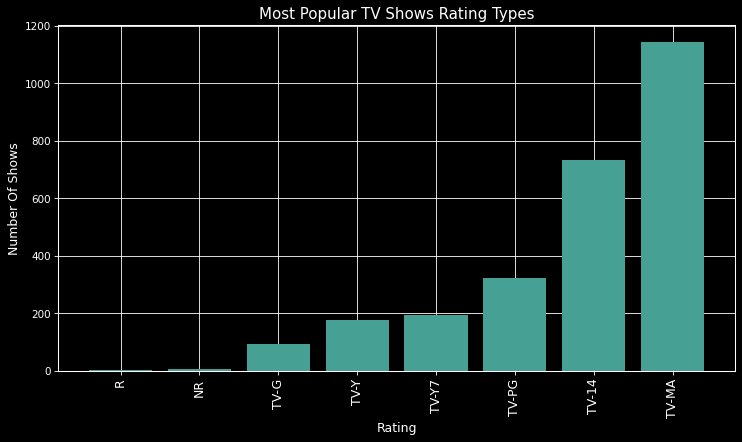

In [261]:
Rating = rating.sort_values(['count']).drop(8)
figure(figsize=(10,6), dpi=75)
#Getting The Data
plt.bar(Rating['rating'], Rating['count'],color='#46A094')
#Creating The Plot
plt.xticks(Rating['rating'],rotation='vertical',size=12)
plt.title('Most Popular TV Shows Rating Types')
plt.xlabel('Rating')
plt.ylabel('Number Of Shows')
plt.style.use('dark_background')
#Plot Show
plt.tight_layout()
plt.show()

In [280]:
tv_country = tv_df[['title','country']].dropna()
top_TV_country_production = NC(tv_country)
top_TV_country_production

Enter The Targeted Column: country
Enter The Range Of Values: 15


,Country,Count
51,brazil,31
52,colombia,32
53,germany,44
54,china,48
55,mexico,58
56,spain,61
57,australia,66
58,taiwan,70
59,india,84
60,france,90


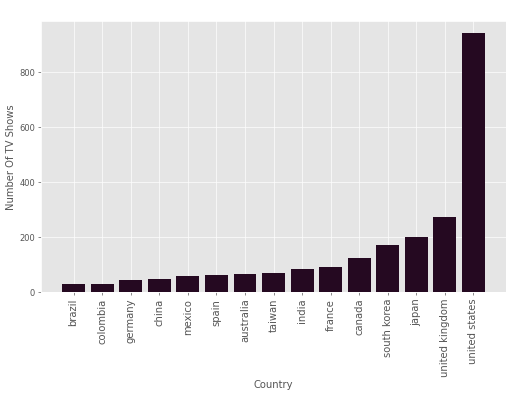

In [294]:
figure(figsize=(10,6), dpi=60)
#Getting The Data
plt.bar(top_TV_country_production['Country'], top_TV_country_production['Count'],color='#250921')
#Creating The Plot
plt.xticks(top_TV_country_production['Country'],rotation='vertical',size=12)
plt.title('Top Countries Of TV Shows Production')
plt.xlabel('Country')
plt.ylabel('Number Of TV Shows')
plt.style.use('ggplot')

#Plot Show
plt.show()

Top Actor Appeared On Netflix Database

[Takahiro Sakurai](https://en.wikipedia.org/wiki/Takahiro_Sakurai) :  is a Japanese voice actor, narrator, and radio personality from Aichi Prefecture, Japan.

In [323]:
actor_tv = tv_df[['cast','count']].dropna()
top_actor = NC(actor_tv)

Enter The Targeted Column: cast
Enter The Range Of Values: 10


In [324]:
top_actor

,Cast,Count
14852,vincent tong,13
14853,david attenborough,14
14854,jun fukuyama,15
14855,yoshimasa hosoya,15
14856,yuichi nakamura,16
14857,junichi suwabe,17
14858,daisuke ono,17
14859,ai kayano,17
14860,yuki kaji,19
14861,takahiro sakurai,25


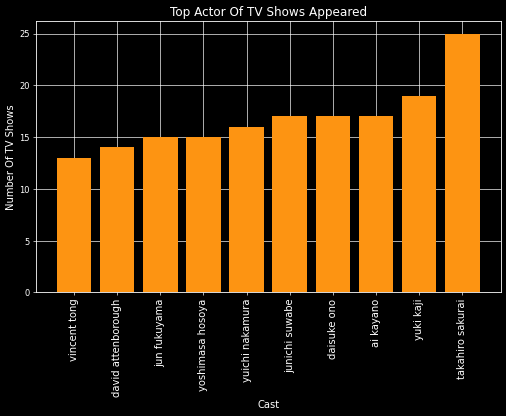

In [336]:
figure(figsize=(10,6), dpi=60)
#Getting The Data
plt.bar(top_actor['Cast'], top_actor['Count'],color='#FD9412')
#Creating The Plot
plt.xticks(top_actor['Cast'],rotation=90,size=12)
plt.title('Top Actor Of TV Shows Appeared')
plt.xlabel('Cast')
plt.ylabel('Number Of TV Shows')
plt.style.use('dark_background')

#Plot Show
plt.show()